In [ ]:
import numpy as np
import timeit
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def create_gbm_minute(init_price, mu, sigma, length):
    """
    Calculates an asset price path using the analytical solution
    to the Geometric Brownian Motion stochastic differential
    equation (SDE).

    Parameters
    ----------
    length : The int number needed to calculate length of the time series.
    init_price: Asset inital price.
    mu: The mean 'drift' of the asset.
    sigma: Volatility expressed annual terms.

    Returns
    -------
    `np.ndarray`
        The asset price path
    """
    n = length
    dt = 1 / (255 * 6.5 * 60) 

    asset_path = np.exp(
        (mu - sigma ** 2 / 2) * dt +
        sigma * np.random.normal(0, np.sqrt(dt), size=n)
    )

    return init_price * asset_path.cumprod()

In [3]:

def Function_runtime(func,*args, **kwargs):
    start = timeit.default_timer()
    result = func(*args, **kwargs)
    
    stop = timeit.default_timer()
    time = stop-start
    return result, time

In [4]:
minutes_length = int(5*255*6.5*60) 
num_assets = 15000
assets = np.zeros((num_assets,minutes_length))
for i in range(num_assets):
    if(i)%50 == 0:
        print(f"Generating asset path completed {int(i/num_assets*100)}%", end = "\r" )
    assets[i] = create_gbm_minute(100, 0.01, 0.2, minutes_length)
print(f"Generating asset path completed 100%", end = "\r" )

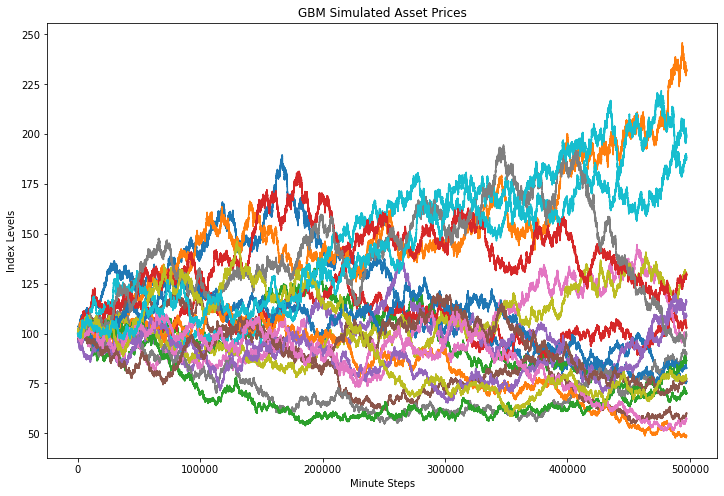

In [5]:
# Plot initial 10 simulated path using matplotlib
fig, axes = plt.subplots(1,1,figsize = (12,8))
for i in range(20):
    axes.plot(assets[i])
# plt.grid(True)
plt.xlabel('Minute Steps')
plt.ylabel('Index Levels')
plt.title('GBM Simulated Asset Prices');
# fig.savefig("figures/prices_simulation.jpg",dpi=400)


In [21]:
asset_easy = assets[:2000,:]
asset_medium = assets[:6000,:]
asset_hard = assets[:15000,:]

In [22]:
easy_runtime = Function_runtime(np.cov, asset_easy)[1]
print(f"2000 assets running time: {easy_runtime}")

500 assets running time: 14.298420865088701


In [23]:
medium_runtime = Function_runtime(np.cov, asset_medium)[1]
print(f"6000 assets running time: {medium_runtime}")

5000 assets running time: 62.78189138416201


In [12]:
hard_runtime = Function_runtime(np.cov, asset_hard)[1]
print(f"15000 assets running time: {hard_runtime}")

10000 assets running time: 277.11869124043733


FileNotFoundError: [Errno 2] No such file or directory: 'figures/running_time.jpg'

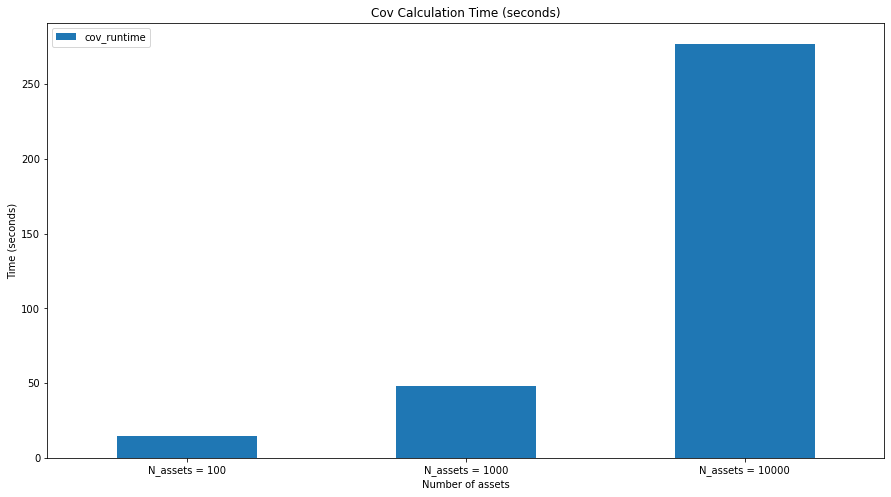

In [14]:
# plot the figures to demonstrate my conclusions
fig, axes = plt.subplots(1,1,figsize = (8,6))
label = ["N_assets = "+str(n) for n in [2000,6000,15000]]

Runtime_pd = pd.DataFrame({
    "cov_runtime":[easy_runtime,medium_runtime,hard_runtime],
    },
    index=label)
Runtime_pd.plot.bar(rot = 0,figsize=(15, 8), ax = axes,title = "Cov Calculation Time (seconds)")
axes.set_xlabel('Number of assets')
axes.set_ylabel('Time (seconds)')
fig.savefig("figures/running_time.jpg",dpi=400)

In [15]:
np.around(Runtime_pd,2)

,cov_runtime
N_assets = 100,14.77
N_assets = 1000,47.94
N_assets = 10000,277.12


In [16]:
time_list = [10,100,200,500,800,1000,2000,3000,4000,5000, 10000]
cost_list = []
for t in time_list:
    cost = Function_runtime(np.cov, assets[:t,:])[1]
    print(f"run {t} in {cost}s")
    cost_list.append(cost)
cost_list

run 10 in 0.028941228985786438s
run 100 in 0.4449658067896962s
run 200 in 0.669441687874496s
run 500 in 1.653065737336874s
run 800 in 3.023553737439215s
run 1000 in 3.8068380849435925s
run 2000 in 12.459017056040466s
run 3000 in 23.871749695390463s
run 4000 in 35.03591045830399s
run 5000 in 46.726446247659624s
run 10000 in 139.74007105454803s


[0.028941228985786438,
 0.4449658067896962,
 0.669441687874496,
 1.653065737336874,
 3.023553737439215,
 3.8068380849435925,
 12.459017056040466,
 23.871749695390463,
 35.03591045830399,
 46.726446247659624,
 139.74007105454803]

In [17]:
cost_list

[0.028941228985786438,
 0.4449658067896962,
 0.669441687874496,
 1.653065737336874,
 3.023553737439215,
 3.8068380849435925,
 12.459017056040466,
 23.871749695390463,
 35.03591045830399,
 46.726446247659624,
 139.74007105454803]

In [18]:
def func(x, a, b, c):
    return a * x**2 + b*x + c

In [19]:
popt, pcov = curve_fit(func, time_list, cost_list)
popt, pcov

(array([ 8.86351368e-07,  5.19765037e-03, -8.24290620e-01]),
 array([[ 9.92699907e-16, -9.19773689e-12,  8.17727583e-09],
        [-9.19773689e-12,  9.50636367e-08, -9.95770185e-05],
        [ 8.17727583e-09, -9.95770185e-05,  2.06899812e-01]]))

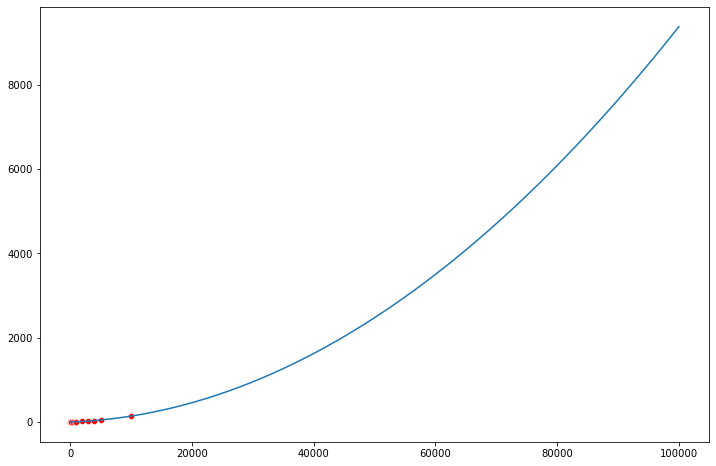

In [20]:
# Plot initial 10 simulated path using matplotlib
fig, ax = plt.subplots(1,1,figsize = (12,8))
sns.scatterplot(time_list, cost_list,ax = ax, color = 'r')
xdata = np.linspace(0, 100000, 1001)
y = func(xdata, popt[0], popt[1], popt[2])
ax.plot(xdata, y)